In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Training_photo_elasticity.csv', sep='\t', header=None)
df_test = pd.read_csv('Testing__photo_elasticity.csv', sep='\t', header=None)
df.shape

C:\Users\vivek\AppData\Local\Temp\ipykernel_3140\3350295769.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,2

(32001, 2161)

In [2]:
df.head

<bound method NDFrame.head of        0     1     2     3     4     5     6     7     8      9     ...  \
0      M2f1  M2f2  M2f3  M2f4  M2f5  M2f6  M2f7  M2f8  M2f9  M2f10  ...   
1       255   255   255   255   255   255   255   255   255    255  ...   
2       255   255   255   255   255   255   255   255   255    255  ...   
3       255   255   255   255   255   255   255   255   255    255  ...   
4       255   255   255   255   255   255   255   254   254    254  ...   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
31996   255   255   254   253   252   251   249   247   244    241  ...   
31997   255   255   255   255   255   254   254   254   253    253  ...   
31998   255   255   255   255   255   255   255   255   255    255  ...   
31999    32    34    35    37    38    40    41    43    44     46  ...   
32000   255   255   255   255   255   254   254   254   253    253  ...   

          2151     2152     2153     2154     2155     2156     2157 

In [3]:
df[:][2160]

0        M2f2161
1              3
2              3
3              3
4              2
          ...   
31996          1
31997          2
31998          3
31999          4
32000          2
Name: 2160, Length: 32001, dtype: object

In [4]:
import numpy as np
np.random.seed(42)
co = np.zeros((4,5))

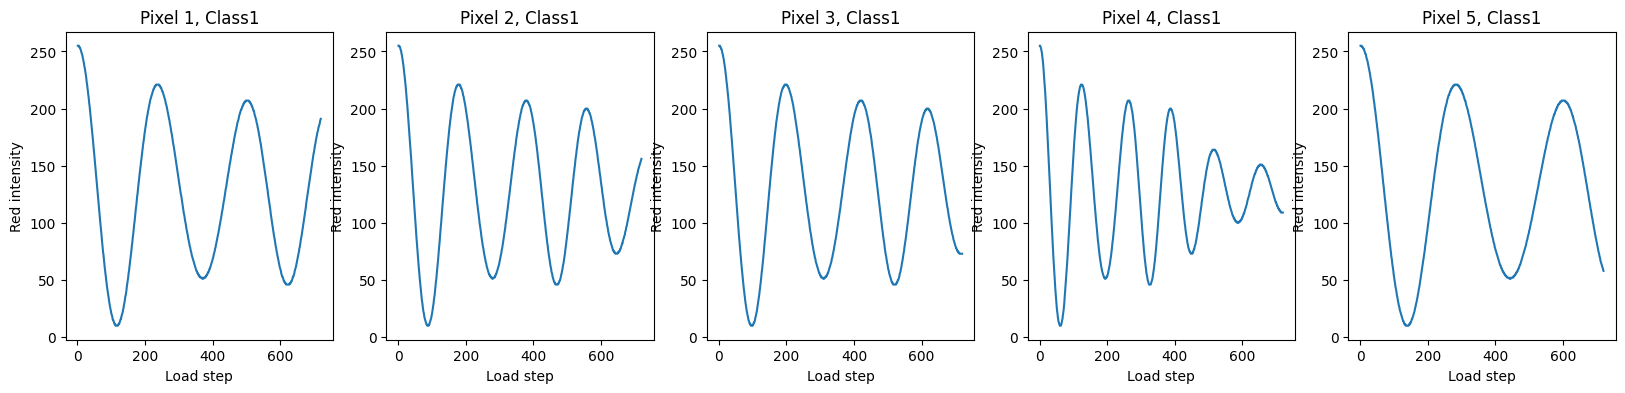

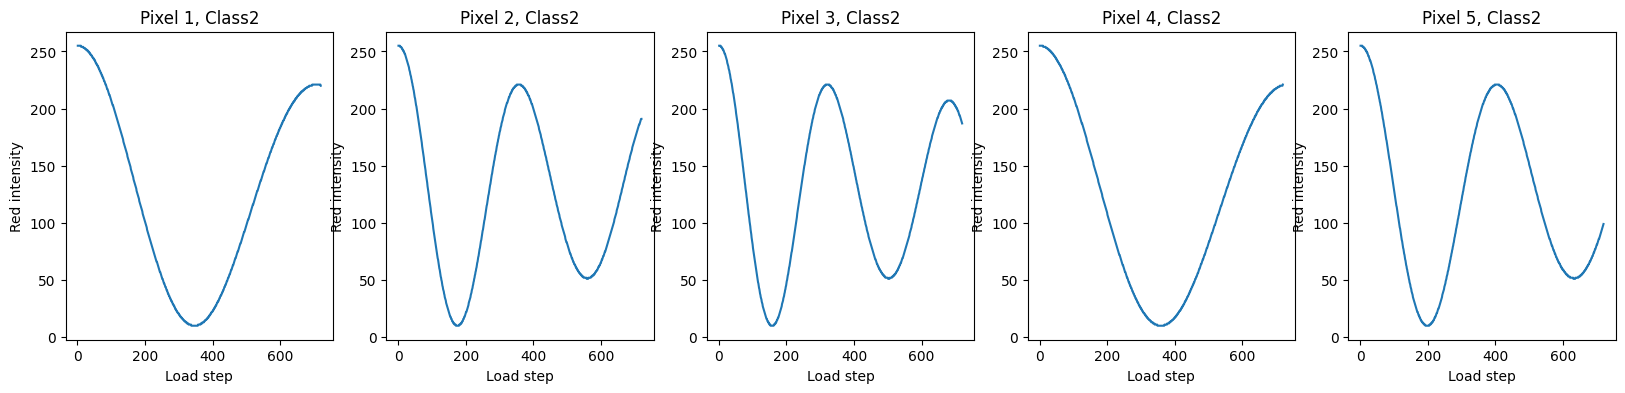

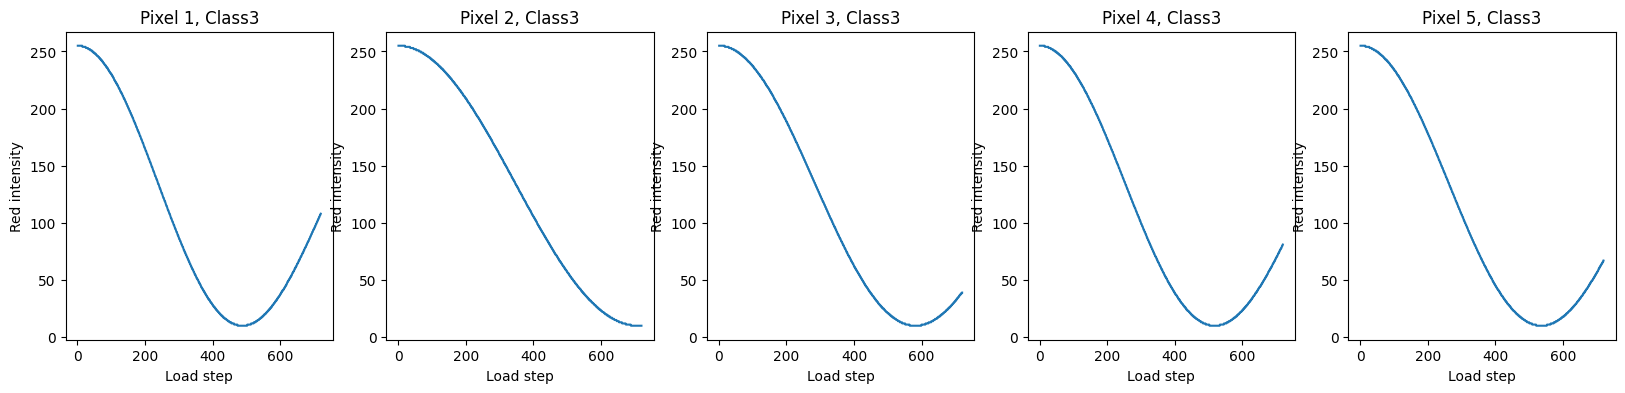

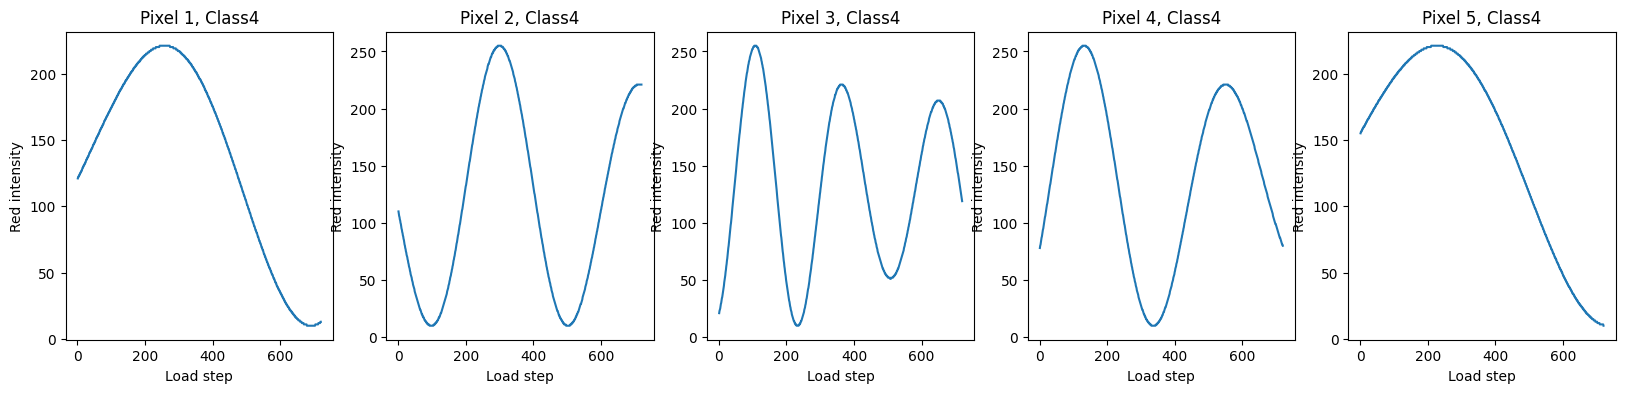

In [5]:
for i in range(1,5):

    class_id = i 

    class_df = df[df.iloc[:, -1] == class_id]
    sampled_df = class_df.sample(n=5, random_state=42)
    red_signals = sampled_df.iloc[:, 0:720].values
    x = np.arange(1, 721)

    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    for j in range(5):
        y = red_signals[j].astype(float).ravel()
        corr = np.corrcoef(x, y)[0, 1]   
        co[i-1,j]= corr
        axes[j].plot(x, red_signals[j])
        axes[j].set_title(f"Pixel {j+1}, Class{i}")
        axes[j].set_xlabel("Load step")
        axes[j].set_ylabel("Red intensity")

In [6]:
print(co)

[[-0.07169699 -0.0487458  -0.01570851 -0.00595695  0.02964787]
 [-0.04025972 -0.11182813  0.08502984 -0.12041559 -0.22881969]
 [-0.82213947 -0.99189334 -0.95787373 -0.88821335 -0.91515156]
 [-0.76238975  0.24547757  0.05023391 -0.09730982 -0.84845888]]


In [7]:
df = df.drop(index=0)
df_test = df_test.drop(index=0)
print(df.shape,df_test.shape)

(32000, 2161) (8000, 2161)


In [8]:
df.iloc[:, -1] = df.iloc[:, -1].astype(int)

X_flat = df.iloc[:, 0:2160].values   
y = df.iloc[:, -1].values.astype(int)          

R = X_flat[:, 0:720]
G = X_flat[:, 720:1440]
B = X_flat[:, 1440:2160]

X = np.stack((R, G, B), axis=2)
X.shape


(32000, 720, 3)

In [9]:
df_test.iloc[:, -1] = df_test.iloc[:, -1].astype(int)

X_flat_test = df_test.iloc[:, 0:2160].values   
y_test = df_test.iloc[:, -1].values.astype(int)          

R = X_flat_test[:, 0:720]
G = X_flat_test[:, 720:1440]
B = X_flat_test[:, 1440:2160]

X_test = np.stack((R, G, B), axis=2)
X_test.shape

(8000, 720, 3)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [11]:
print(X_train.shape)  
print(X_val.shape)    


(25600, 720, 3)
(6400, 720, 3)


In [12]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat   = X_val.reshape(X_val.shape[0], -1)


In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    n_jobs=-1,
    multi_class='multinomial'
)

model.fit(X_train_flat, y_train)
y_pred = model.predict(X_val_flat)


C:\Users\vivek\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))


Accuracy: 0.95484375
              precision    recall  f1-score   support

           1       0.99      0.98      0.99      1600
           2       0.96      0.98      0.97      1600
           3       0.93      0.93      0.93      1600
           4       0.94      0.93      0.94      1600

    accuracy                           0.95      6400
   macro avg       0.95      0.95      0.95      6400
weighted avg       0.95      0.95      0.95      6400

[[1574   22    4    0]
 [   5 1562   33    0]
 [   0   26 1481   93]
 [  13   11   82 1494]]


In [15]:
df = df.apply(pd.to_numeric)
df_test = df_test.apply(pd.to_numeric)
print(df_test.dtypes.head())


0    int64
1    int64
2    int64
3    int64
4    int64
dtype: object


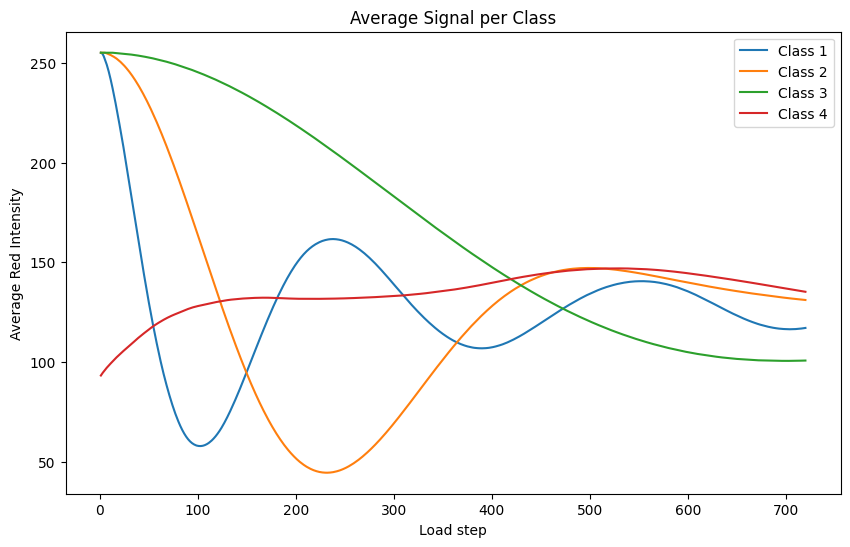

In [16]:
import matplotlib.pyplot as plt

x = np.arange(1,721)

plt.figure(figsize=(10,6))

for c in range(1,5):
    class_df = df[df.iloc[:, -1] == c]
    red = class_df.iloc[:, 0:720].values
    mean_signal = red.mean(axis=0)
    plt.plot(x, mean_signal, label=f'Class {c}')

plt.xlabel("Load step")
plt.ylabel("Average Red Intensity")
plt.title("Average Signal per Class")
plt.legend()
plt.show()


In [17]:
X_train = X_train.astype("float32")  / 255.0
X_val   = X_val.astype("float32")  / 255.0
X_test = X_test.astype("float32") /255.0

y_train = y_train - 1
y_val   = y_val - 1
y_test = y_test - 1

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential([
    Conv1D(32, kernel_size=7, activation='relu', input_shape=(720,3)),
    MaxPooling1D(pool_size=2),

    Conv1D(64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),

    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(4, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

C:\Users\vivek\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 714, 32)        │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 357, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 353, 64)        │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 176, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 174, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 87, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 11136)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,425,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,461,764 (5.58 MB)

 Trainable params: 1,461,764 (5.58 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
X_train = X_train.astype("float32")
X_val   = X_val.astype("float32")


y_train = y_train.astype("int32")
y_val   = y_val.astype("int32")


In [20]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=64
)

model.evaluate(X_val, y_val)


Epoch 1/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 45s 103ms/step - accuracy: 0.9392 - loss: 0.2044 - val_accuracy: 0.9673 - val_loss: 0.1087
Epoch 2/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 0.9637 - loss: 0.1361 - val_accuracy: 0.9688 - val_loss: 0.0968
Epoch 3/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 43s 107ms/step - accuracy: 0.9715 - loss: 0.1097 - val_accuracy: 0.9770 - val_loss: 0.0806
Epoch 4/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.9745 - loss: 0.1018 - val_accuracy: 0.9769 - val_loss: 0.0835
Epoch 5/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 43s 107ms/step - accuracy: 0.9745 - loss: 0.0993 - val_accuracy: 0.9811 - val_loss: 0.0710
Epoch 6/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 80s 103ms/step - accuracy: 0.9765 - loss: 0.0947 - val_accuracy: 0.9769 - val_loss: 0.0787
Epoch 7/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.9757 - loss: 0.0964 - val_accuracy: 0.9816 - val_loss: 0.0738
Epoch 8/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 0.9773 - loss: 0

[0.06549865007400513, 0.9810937643051147]

In [25]:
y_pred = model.predict(X_val)
y_pred = y_pred.argmax(axis=1)

print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1600
           1       0.98      0.96      0.97      1600
           2       0.96      1.00      0.98      1600
           3       1.00      0.98      0.99      1600

    accuracy                           0.98      6400
   macro avg       0.98      0.98      0.98      6400
weighted avg       0.98      0.98      0.98      6400

[[1572   24    3    1]
 [   5 1536   59    0]
 [   0    0 1600    0]
 [  12    9    8 1571]]


In [22]:
model.evaluate(X_test, y_test)


250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9822 - loss: 0.0682


[0.06817431002855301, 0.9822499752044678]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1999
           1       0.98      0.96      0.97      2000
           2       0.96      1.00      0.98      2001
           3       1.00      0.99      0.99      2000

    accuracy                           0.98      8000
   macro avg       0.98      0.98      0.98      8000
weighted avg       0.98      0.98      0.98      8000

[[1961   32    6    0]
 [   5 1927   68    0]
 [   0    2 1999    0]
 [  12    8    9 1971]]
